<a href="https://colab.research.google.com/github/leikcaro/fashion-minst-convolutional/blob/main/CNN_on_Fashion_MINST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [3]:
# Obtener datos
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Semana 10/fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Guardar X datos
X = df.drop(columns = 'label')
# Codificar nuestro objetivo
y = df['label']

In [5]:
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)


In [6]:
# Escalar datos entre 0 y 1
X_train = X_train / 255
X_test = X_test / 255

In [15]:
# Reformar datos
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1)

In [17]:
X_train[0].shape

(28, 28, 1)

In [18]:
# Creación de modelo
model = Sequential()
# Capas encargadas de obtener información de la imagen
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
# Capas para la clasificación en base a la información obtenida en 
# capas anteriores
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_cnn = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
1407/1407 [==============================] - 46s 33ms/step - loss: 0.5570 - accuracy: 0.7964 - val_loss: 0.3900 - val_accuracy: 0.8561
Epoch 2/10
1407/1407 [==============================] - 45s 32ms/step - loss: 0.3531 - accuracy: 0.8732 - val_loss: 0.3174 - val_accuracy: 0.8849
Epoch 3/10
1407/1407 [==============================] - 44s 31ms/step - loss: 0.3011 - accuracy: 0.8916 - val_loss: 0.3028 - val_accuracy: 0.8907
Epoch 4/10
1407/1407 [==============================] - 43s 31ms/step - loss: 0.2673 - accuracy: 0.9019 - val_loss: 0.2591 - val_accuracy: 0.9042
Epoch 5/10
1407/1407 [==============================] - 43s 31ms/step - loss: 0.2433 - accuracy: 0.9124 - val_loss: 0.2715 - val_accuracy: 0.8988
Epoch 6/10
1407/1407 [==============================] - 43s 31ms/step - loss: 0.2198 - accuracy: 0.9190 - val_loss: 0.2502 - val_accuracy: 0.9072
Epoch 7/10
1407/1407 [==============================] - 45s 32ms/step - loss: 0.1996 - accuracy: 0.9276 - val_loss: 0.2571 -

469/469 - 4s - loss: 0.2669 - accuracy: 0.9101 - 4s/epoch - 9ms/step


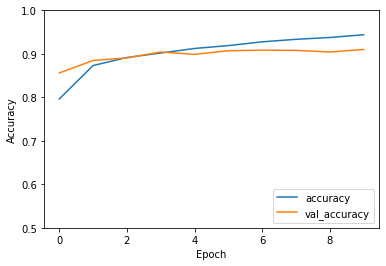

In [21]:
plt.plot(history_cnn.history['accuracy'], label='accuracy')
plt.plot(history_cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

In [ ]:
#podriamos seguir con mas epochs para lograr mejores resultados, se ve que no esta overfitteado